### Contexto

---

Rede Neural do tipo Perceptron de Multíplas Camadas com 3 entradas $x_1$, $x_2$ e $x_3$ e 10 neurônios em uma camada intermediária e um único neurônio na camada de saída para $y$

<img src="EPC4_Rede_Adaline.jpg" width="600">


### Bibliotecas utilizadas

---

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Tratamento dos dados

---

In [2]:
# Leitura dos dados

data = pd.read_csv('data_58_RNA.txt', delim_whitespace=True)

In [3]:
data

,x1,x2,x3,d
0,0.8799,0.7998,0.3972,0.8399
1,0.5700,0.5111,0.2418,0.6258
2,0.6796,0.4117,0.3370,0.6622
3,0.3567,0.2967,0.6037,0.5969
4,0.3866,0.8390,0.0232,0.5316
...,...,...,...,...
195,0.0339,0.4669,0.1526,0.3250
196,0.0080,0.8988,0.4201,0.5404
197,0.9955,0.8897,0.6175,0.9360
198,0.7408,0.5351,0.2732,0.6949


In [4]:
# Separacao dos dados

x1 = data['x1'].copy()
x2 = data['x2'].copy()
x3 = data['x3'].copy()
X = pd.concat([x1, x2, x3], axis=1)

d = data['d'].copy()

In [5]:
# Verifica a normalizacao

min = X.values.min()
max = X.values.max()

print(f'min = {min} \n max = {max}')

min = 0.0 
 max = 1.0


Já normalizado

In [6]:
X = np.array(X)

d = np.array(d)
d = d.reshape(-1, 1)

### Treinamento da rede neural MLP

---

In [68]:
# valor maximo de epocas
MAX_EPOCA = int(10e+6)

# Taxa de aprendizado
n = 0.1

# Precisao
p = 10e-6

Funcao logistica (sigmoide):

$f(u) = 1 / (1 + e^{(-β*u)})$

sendo $β$ o fator de inclinacao da funcao e $u$ a entrada

In [8]:
def func_ativacao(u, beta):

    g = 1 / (1 + np.exp(-beta * u))

    return g

In [ ]:
# Plot Funcao de Ativacao

u = np.arange(-5,5,0.1)
resultado = func_ativacao(u, 0.5)

plt.figure(figsize=(8, 6))
plt.plot(u, resultado, label='Função Sigmoide', linewidth=2)
plt.xlabel('u')
plt.ylabel('g(u)')
plt.title('Função de Ativação Sigmoide')
plt.grid(True)
plt.legend()
plt.show()

In [10]:
def func_ativacao_derivada(u, beta):
    
    gd = (beta * np.exp(-beta * u))/((np.exp(-beta * u) + 1) ** 2)

    return gd

In [ ]:
# Plot Funcao de Ativacao Derivada

u = np.arange(-5,5,0.1)
resultado = func_ativacao_derivada(u, 0.5)

plt.figure(figsize=(8, 6))
plt.plot(u, resultado, label='Função Sigmoide Derivada', linewidth=2)
plt.xlabel('u')
plt.ylabel('g(u)')
plt.title('Função de Ativação Sigmoide Derivada')
plt.grid(True)
plt.legend()
plt.show()

In [69]:
# X -> dados de entrada
# d -> saida desejada (alvo)
# n -> taxa de aprendizado
# MAX_EPOCA -> quantidade maxima de epcas de treinamento
# p -> precisao
# beta -> inclinacao das funcoes

def treinamento(X, d, n, MAX_EPOCA, p, beta):

    # Lista de matrizes de pesos sinapticos iniciais e ajustados
    lista_Wi_1 = []
    lista_Wi_2 = []
    lista_W_1_bp = []
    lista_W_2_bp = []

    for n_treino in range(5):

        print('-'*30)
        print(f'Treinamento numero: {n_treino + 1}')
        print('-'*30)
        
        # Contador de epocas
        epoca = 0

        # Vetor de erros
        erro = np.zeros(MAX_EPOCA)

        while(epoca < MAX_EPOCA):

            # print(f'epoca {epoca}')

            #######################
            # ETAPAS FEED FORWARD #
            #######################
            
            # entradas I_1 e saida Y_1 da camada 1

            # Pesos aleatorios entre 0 e 1 do n_treino
            # (10, 3) -> (10 neuronios, 3 entradas)
            W_1 = np.random.rand(10,3)

            # Salva na tabela Wi_1
            if epoca == 0:
                Wi_1 = pd.DataFrame(W_1, columns=['w0', 'w1', 'w2'])

                lista_Wi_1.append(W_1)

            # Entrada I_1 = X * W_1
            I_1 = X.dot(W_1.T)

            # Saida Y_1 = g(I_1)
            Y_1 = func_ativacao(I_1, beta)
            
            # entrada I_2 e saida Y_2 da camada 2 de saída

            # Pesos aleatorios entre 0 e 1 do n_treino
            # (1, 10) -> (1 neuronios, 10 entradas)
            W_2 = np.random.rand(1, 10)

            # Salva na tabela W_2
            if epoca == 0:
                Wi_2 = pd.DataFrame(W_2, columns=['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9'])

                lista_Wi_2.append(W_2)


            # Entrada I_2 = I_1 * W_2 (do treino em questao)
            I_2 = (I_1).dot(W_2.T)

            # Saida Y_2 = g(I_2)
            Y_2 = func_ativacao(I_2, beta)

            # Erro da previsao FOWARD
            erro[epoca] = np.mean((d - Y_2) ** 2)
            
            ######################
            # ETAPAS DE BACKWARD #
            ######################

            # gradiente local em relacao ao j-esimo neuronio da camada 2 de saida (delta_2)

            gd_2 = func_ativacao_derivada(I_2, beta)

            erro_2 = d - Y_2

            delta_2 = erro_2*gd_2

            # ajuste de W_2

            corr_2 = ((n * delta_2).T).dot(Y_1)

            W_2_bp = W_2 + corr_2

            # Salva na tabela W_2
            Wf_2 = pd.DataFrame(W_2_bp, columns=['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9'])

            # gradiente local em relacao ao j-esimo neuronio da camada 1 (delta_1)

            gd_1 = func_ativacao_derivada(I_1, beta)

            delta_1 = (delta_2.dot(W_2_bp)) * gd_1

            # ajuste de W_1
            
            corr_1 = ((n * delta_1).T).dot(X)

            W_1_bp = W_1 + corr_1
            
            # print('-'*30)
            # print(f'Pesos ajustados - camada 1: \n {W_1_bp}')
            # print('-'*30)


            # Salva na tabela W_2
            Wf_1 = pd.DataFrame(W_1_bp, columns=['w0', 'w1', 'w2'])

            # Calculo da saida ajustada Y_2_bp

            I_1_bp = X.dot(W_1_bp.T)

            Y_1_bp = func_ativacao(I_1_bp, beta)

            I_2_bp = (I_1_bp).dot(W_2_bp.T)

            Y_2_bp = func_ativacao(I_2_bp, beta)

            # Erro da previsao PÓS-BACKWARD
            erro[epoca + 1] = np.mean((d - Y_2_bp) ** 2)

            # Incremente de epoca
            epoca = epoca + 1

            # Busca pela precisao
            if np.all(abs(erro[epoca] - erro[epoca - 1]) < p):

                print(f'Convergência em {epoca} épocas')
                print(f'Erro Médio Quadrático = {erro[epoca]}')

                # Armazena as matrizes de pesos sinapticos ajustados na lista
                lista_W_1_bp.append(W_1_bp)
                lista_W_2_bp.append(W_2_bp)
                
                # Grafico do erro
                plt.figure()
                plt.plot(np.arange(epoca+1), erro[:epoca+1], linewidth=1)
                ttl = f'Erro pelas épocas (Treinamento {n_treino + 1})'
                plt.title(ttl)
                plt.ylabel('Erro Quadrático Médio')
                plt.xlabel('Épocas')
                plt.xlim(0, epoca)
                # plt.ylim(0, 1)
                plt.grid()
                plt.savefig(f'Fig/EPC5_n_treino{n_treino + 1}.pdf', format='pdf')
                plt.show()

                break

    return lista_Wi_1, lista_Wi_2, lista_W_1_bp, lista_W_2_bp

------------------------------
Treinamento numero: 1
------------------------------
Convergência em 20 épocas
Erro Médio Quadrático = 0.019704631389685572


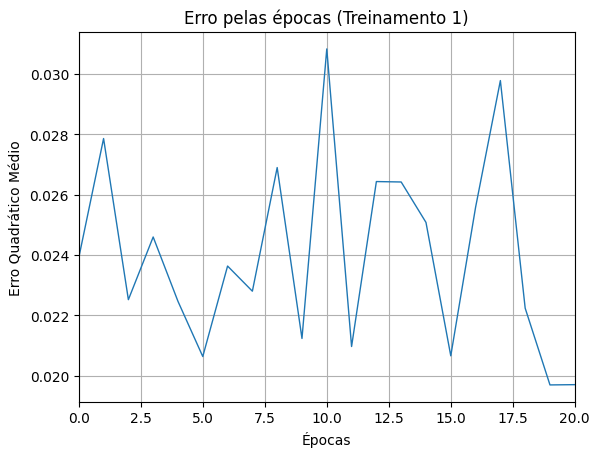

------------------------------
Treinamento numero: 2
------------------------------
Convergência em 12 épocas
Erro Médio Quadrático = 0.019691194688137733


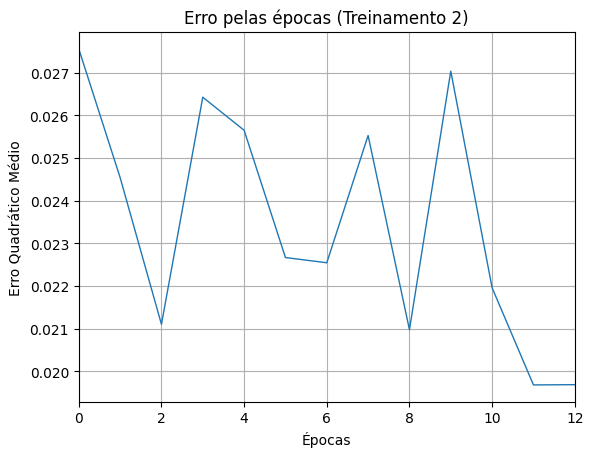

------------------------------
Treinamento numero: 3
------------------------------
Convergência em 4 épocas
Erro Médio Quadrático = 0.019961612755463834


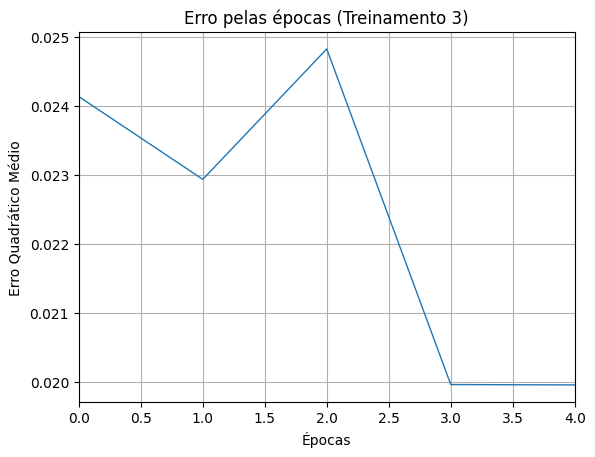

------------------------------
Treinamento numero: 4
------------------------------
Convergência em 80 épocas
Erro Médio Quadrático = 0.01966329523703261


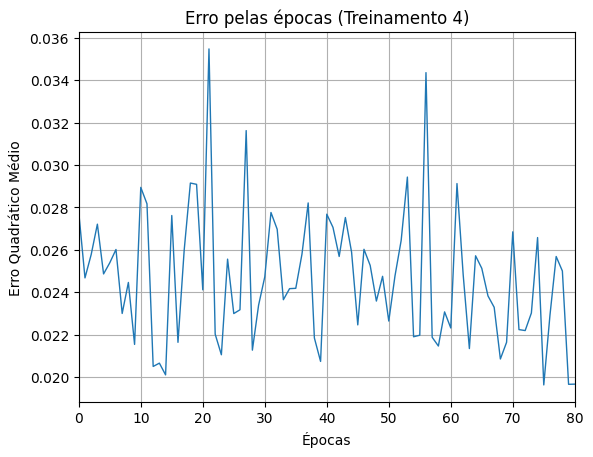

------------------------------
Treinamento numero: 5
------------------------------
Convergência em 2 épocas
Erro Médio Quadrático = 0.020112855301581994


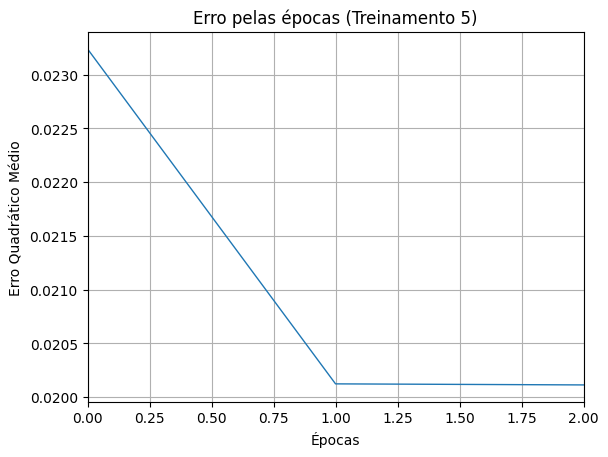

In [73]:
lista_Wi_1, lista_Wi_2, lista_W_1_bp, lista_W_2_bp = treinamento(X, d, n, MAX_EPOCA, p, 0.1)

In [96]:
lista_Wi_1[0]

array([[0.22022066, 0.24222251, 0.00781444],
       [0.00675876, 0.89399744, 0.46372366],
       [0.60646258, 0.44857058, 0.59512426],
       [0.58798025, 0.71132156, 0.99050055],
       [0.95752402, 0.2304464 , 0.34845708],
       [0.94296187, 0.8867851 , 0.00928559],
       [0.33538539, 0.14514693, 0.95466576],
       [0.46544813, 0.41407113, 0.78844567],
       [0.23238186, 0.73991379, 0.18108549],
       [0.11608001, 0.97075529, 0.08745555]])

In [92]:
for i, matriz in enumerate(lista_Wi_1):
    print(f"Matriz {i + 1}:")
    print(matriz)
    print(type(matriz))
    print((matriz).shape)

Matriz 1:
[[0.22022066 0.24222251 0.00781444]
 [0.00675876 0.89399744 0.46372366]
 [0.60646258 0.44857058 0.59512426]
 [0.58798025 0.71132156 0.99050055]
 [0.95752402 0.2304464  0.34845708]
 [0.94296187 0.8867851  0.00928559]
 [0.33538539 0.14514693 0.95466576]
 [0.46544813 0.41407113 0.78844567]
 [0.23238186 0.73991379 0.18108549]
 [0.11608001 0.97075529 0.08745555]]
<class 'numpy.ndarray'>
(10, 3)
Matriz 2:
[[0.0640491  0.74248435 0.22578877]
 [0.62267577 0.39550861 0.16761013]
 [0.90130774 0.12243468 0.74286258]
 [0.46274132 0.5786327  0.21906672]
 [0.09517942 0.91851961 0.73843479]
 [0.8957996  0.62308404 0.35205558]
 [0.53978341 0.02714286 0.9267867 ]
 [0.97132677 0.97990504 0.51133632]
 [0.45973235 0.20974096 0.4304365 ]
 [0.50901088 0.107051   0.27343255]]
<class 'numpy.ndarray'>
(10, 3)
Matriz 3:
[[0.26359868 0.07422499 0.78343015]
 [0.38696361 0.08756855 0.37161805]
 [0.42169122 0.27458115 0.4969152 ]
 [0.74730495 0.15384227 0.39138773]
 [0.40789945 0.05710587 0.70923923]
 [0.

### Teste da rede neural

---

In [42]:
data_teste = pd.read_csv('data_teste_58_RNA.txt', delim_whitespace=True)

In [43]:
data_teste

,x1,x2,x3,d
0,0.0611,0.2860,0.7464,0.4831
1,0.5102,0.7464,0.0860,0.5965
2,0.0004,0.6916,0.5006,0.5318
3,0.9430,0.4476,0.2648,0.6843
4,0.1399,0.1610,0.2477,0.2872
5,0.6423,0.3229,0.8567,0.7663
6,0.6492,0.0007,0.6422,0.5666
7,0.1818,0.5078,0.9046,0.6601
8,0.7382,0.2647,0.1916,0.5427
9,0.3879,0.1307,0.8656,0.5836


In [47]:
# Separacao dos dados de teste

x1_teste = data_teste['x1'].copy()
x2_teste = data_teste['x2'].copy()
x3_teste = data_teste['x3'].copy()
X_teste = pd.concat([x1_teste, x2_teste, x3_teste], axis=1)

d_teste = data_teste['d'].copy()

In [50]:
X_teste = np.array(X_teste)

d_teste = np.array(d_teste)
d_teste = d_teste.reshape(-1, 1)

In [93]:
type(W_2_bp)
len(d_teste)

20

In [99]:
def teste(X_teste, d_teste, W_1_bp, W_2_bp, beta):

    # Vetor de erros
    erro = np.zeros(5)

    # Vetor de variancia
    variancia = np.zeros(5)

    # Lista de previsao
    lista_Y_2 = []

    # contador -> c

    for n_teste in range(5):

        print('-'*30)
        print(f'Teste numero: {n_teste}')
        print('-'*30)

        #######################
        # ETAPAS FEED FORWARD #
        #######################
        
        # entradas I_1 e saida Y_1 da camada 1

        I_1 = X_teste.dot(lista_Wi_1[n_teste].T)

        Y_1 = func_ativacao(I_1, beta)
        
        # entrada I_2 e saida Y_2 da camada 2 de saída

        I_2 = (I_1).dot(lista_Wi_2[n_teste].T)

        Y_2 = func_ativacao(I_2, beta)

        # Erro Relativo da previsao FOWARD
        erro[n_teste] = np.mean(((np.abs(d_teste - Y_2))/(np.abs(d_teste)))*100)

        # Variancia da previsao FOWARD
        variancia[n_teste] = (np.sum((d_teste - Y_2) ** 2))/(len(d_teste)-1)

        print(f'Erro Relativo Médio = {erro[n_teste]}')
        print(f'Variancia = {variancia[n_teste]}')
        print(Y_2.T)

        lista_Y_2.append(Y_2)

    return lista_Y_2

In [101]:
previsar_RNA_58 = teste(X_teste, d_teste, W_1_bp, W_2_bp, 0.5)

------------------------------
Teste numero: 0
------------------------------
Erro Relativo Médio = 46.891400039201265
Variancia = 0.06570847306262571
[[0.79763631 0.84694334 0.82940941 0.87807239 0.66333414 0.89908972
  0.81467614 0.88149642 0.80307123 0.83898647 0.88813158 0.86683637
  0.68200539 0.91842716 0.78260378 0.92246426 0.92287637 0.85494583
  0.91631914 0.79455728]]
------------------------------
Teste numero: 1
------------------------------
Erro Relativo Médio = 36.581069506154535
Variancia = 0.040094244866590294
[[0.71507023 0.79381333 0.7363575  0.84835115 0.62383929 0.84825088
  0.77996231 0.80040559 0.77851394 0.77803005 0.80762744 0.83315335
  0.62171643 0.87012426 0.70944375 0.88324096 0.84758193 0.7760246
  0.88288651 0.72843588]]
------------------------------
Teste numero: 2
------------------------------
Erro Relativo Médio = 47.51369069329494
Variancia = 0.06850687478008718
[[0.82476904 0.79215415 0.79486381 0.87736959 0.67122089 0.92392596
  0.87062483 0.89395

In [104]:
previsar_RNA_58[2]

array([[0.82476904],
       [0.79215415],
       [0.79486381],
       [0.87736959],
       [0.67122089],
       [0.92392596],
       [0.87062483],
       [0.89395342],
       [0.81014738],
       [0.88589085],
       [0.88506796],
       [0.86421703],
       [0.65967681],
       [0.88579341],
       [0.82148551],
       [0.94573115],
       [0.90697102],
       [0.80013356],
       [0.91383905],
       [0.8382746 ]])

### Aplicacação da rede neural

---

In [38]:
def app(MAX_EPOCA, n, p, wi, wf, X_norm, y, X_teste_norm):

    pesos_inicias, pesos_finais = treinamento(MAX_EPOCA, n, p, wi, wf, X_norm, y)

    resultado = teste(X_teste_norm, pesos_finais)

    return pesos_inicias, pesos_finais, resultado

------------------------------
Treinamento numero: 0
------------------------------
Pesos iniciais aleatorios: 
 [[0.84514022]
 [0.43907428]
 [0.29719178]
 [0.55122037]
 [0.9674655 ]]
------------------------------
Convergência em 656 épocas
Pesos finais: 
 [[ 0.52264687]
 [ 0.48831271]
 [-0.03446504]
 [-0.35463238]
 [-0.0775345 ]]


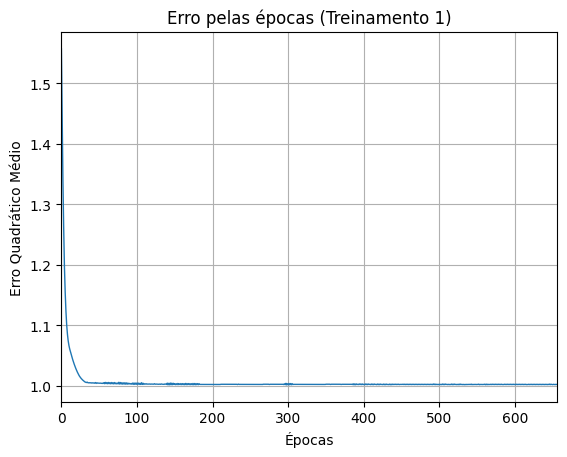

------------------------------
Treinamento numero: 1
------------------------------
Pesos iniciais aleatorios: 
 [[0.93748445]
 [0.33033282]
 [0.51042399]
 [0.5648639 ]
 [0.8910466 ]]
------------------------------
Convergência em 713 épocas
Pesos finais: 
 [[ 0.55389949]
 [ 0.50736974]
 [-0.02799277]
 [-0.37291252]
 [-0.0789534 ]]


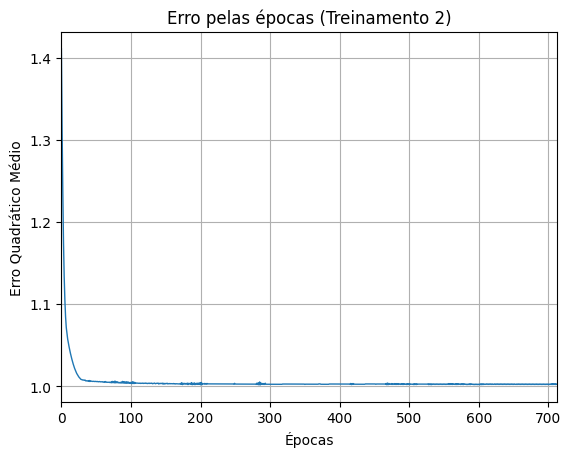

------------------------------
Treinamento numero: 2
------------------------------
Pesos iniciais aleatorios: 
 [[0.37673481]
 [0.78070487]
 [0.85334294]
 [0.47005666]
 [0.24894812]]
------------------------------
Convergência em 840 épocas
Pesos finais: 
 [[ 0.54207833]
 [ 0.51155427]
 [-0.0330187 ]
 [-0.3717651 ]
 [-0.08105188]]
------------------------------
Treinamento numero: 3
------------------------------
Pesos iniciais aleatorios: 
 [[0.83363856]
 [0.5949735 ]
 [0.05689374]
 [0.60143975]
 [0.63519491]]
------------------------------
Convergência em 317 épocas
Pesos finais: 
 [[ 0.54600174]
 [ 0.49224773]
 [ 0.00745595]
 [-0.35271428]
 [-0.07480509]]
------------------------------
Treinamento numero: 4
------------------------------
Pesos iniciais aleatorios: 
 [[0.60707165]
 [0.48089943]
 [0.90889058]
 [0.91251244]
 [0.14343133]]
------------------------------
Convergência em 819 épocas
Pesos finais: 
 [[ 0.46772083]
 [ 0.44595318]
 [-0.03762148]
 [-0.32293995]
 [-0.07156867]

In [134]:
pesos_inicias, pesos_finais, resultado = app(MAX_EPOCA, n, p, wi, wf, X_norm, y, X_teste)

### Resultados

---

In [135]:
pesos_inicias

,w0,w1,w2,w3,w4
0,0.84514,0.439074,0.297192,0.55122,0.967466
1,0.937484,0.330333,0.510424,0.564864,0.891047
2,0.376735,0.780705,0.853343,0.470057,0.248948
3,0.833639,0.594973,0.056894,0.60144,0.635195
4,0.607072,0.480899,0.908891,0.912512,0.143431


In [136]:
pesos_finais

,w0,w1,w2,w3,w4
0,0.522647,0.488313,-0.034465,-0.354632,-0.077534
1,0.553899,0.50737,-0.027993,-0.372913,-0.078953
2,0.542078,0.511554,-0.033019,-0.371765,-0.081052
3,0.546002,0.492248,0.007456,-0.352714,-0.074805
4,0.467721,0.445953,-0.037621,-0.32294,-0.071569
